## First we import all the important libraries

In [2]:
import cv2
import numpy as np

## Q1. Read an image (“Image_1.jpg”) and extract the following features of the image:
```
a. Size of an image
b. Pixels of an image
c. Resolution of image
d. Data type
e. Random portion of image - show this portion in the submission file
```

### Loading the image in python

In [3]:
img= cv2.imread('Image_1.jpg')

In [17]:
# Getting the Height and Width of the image
height, width = img.shape[:2]

In [18]:
# Size of the image
img.size

6912000

**This image size would be equivalent to the number of bytes an image takes to get stored, which will be equal to number of:**
```
Total Pixels x Number of colour channels
```

In [87]:
# Image Resolution is:
img.shape[:2]

(1200, 1920)

In [4]:
#display the image
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# Total number of pixels in this image are:
img.shape[0]*img.shape[1]

2304000

In [23]:
# Data Type of this image
img.dtype

dtype('uint8')

#### Random portion of image - show this portion in the submission file

### Remember, the image size is given in row x column and below, 518:720 are actually row values and the other two ranges are column values. It doesn't work pixel to pixel form. It works as normally how numpy slicing works.

In [5]:
blue_balloon = img[518:720,959:1110]

In [7]:
#display the image
cv2.imshow('Image',blue_balloon)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Now to get this balloon as a separate image, we need to save it:

In [6]:
import os

In [46]:
#know your current directory
os.getcwd()

'C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment'

In [47]:
#Of a specific folder
path='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision'
lis2=os.listdir(path)
lis2

['.ipynb_checkpoints',
 'Computer Vision S1.ipynb',
 'CV basics.ipynb',
 'imagetowork.jpg',
 'imagetowork2.jpg',
 'Image_1.jpg',
 'Week 1 Assignment']

### Let's create a path to save this image:

In [39]:
savepath='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment\\outputs'

In [53]:
cv2.imwrite(os.path.join(savepath , 'Blue_Balloon.jpg'), blue_balloon)
cv2.waitKey(0)

-1

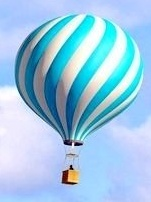

### And this is the final output.

### We can also put this balloon in a separate location of the image. Let's do this and get that as an output:

### So below I found a nice area I can place this balloon, and then found the right size of the coordinates. Let's see if this work or not

In [8]:
img[530:732, 338:489] = blue_balloon

In [9]:
#display the image
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### It absolutely worked, let's get that as an output and save it

In [60]:
cv2.imwrite(os.path.join(savepath , 'NewBalloonImage.jpg'), img)
cv2.waitKey(0);

### Let's see how that looks:

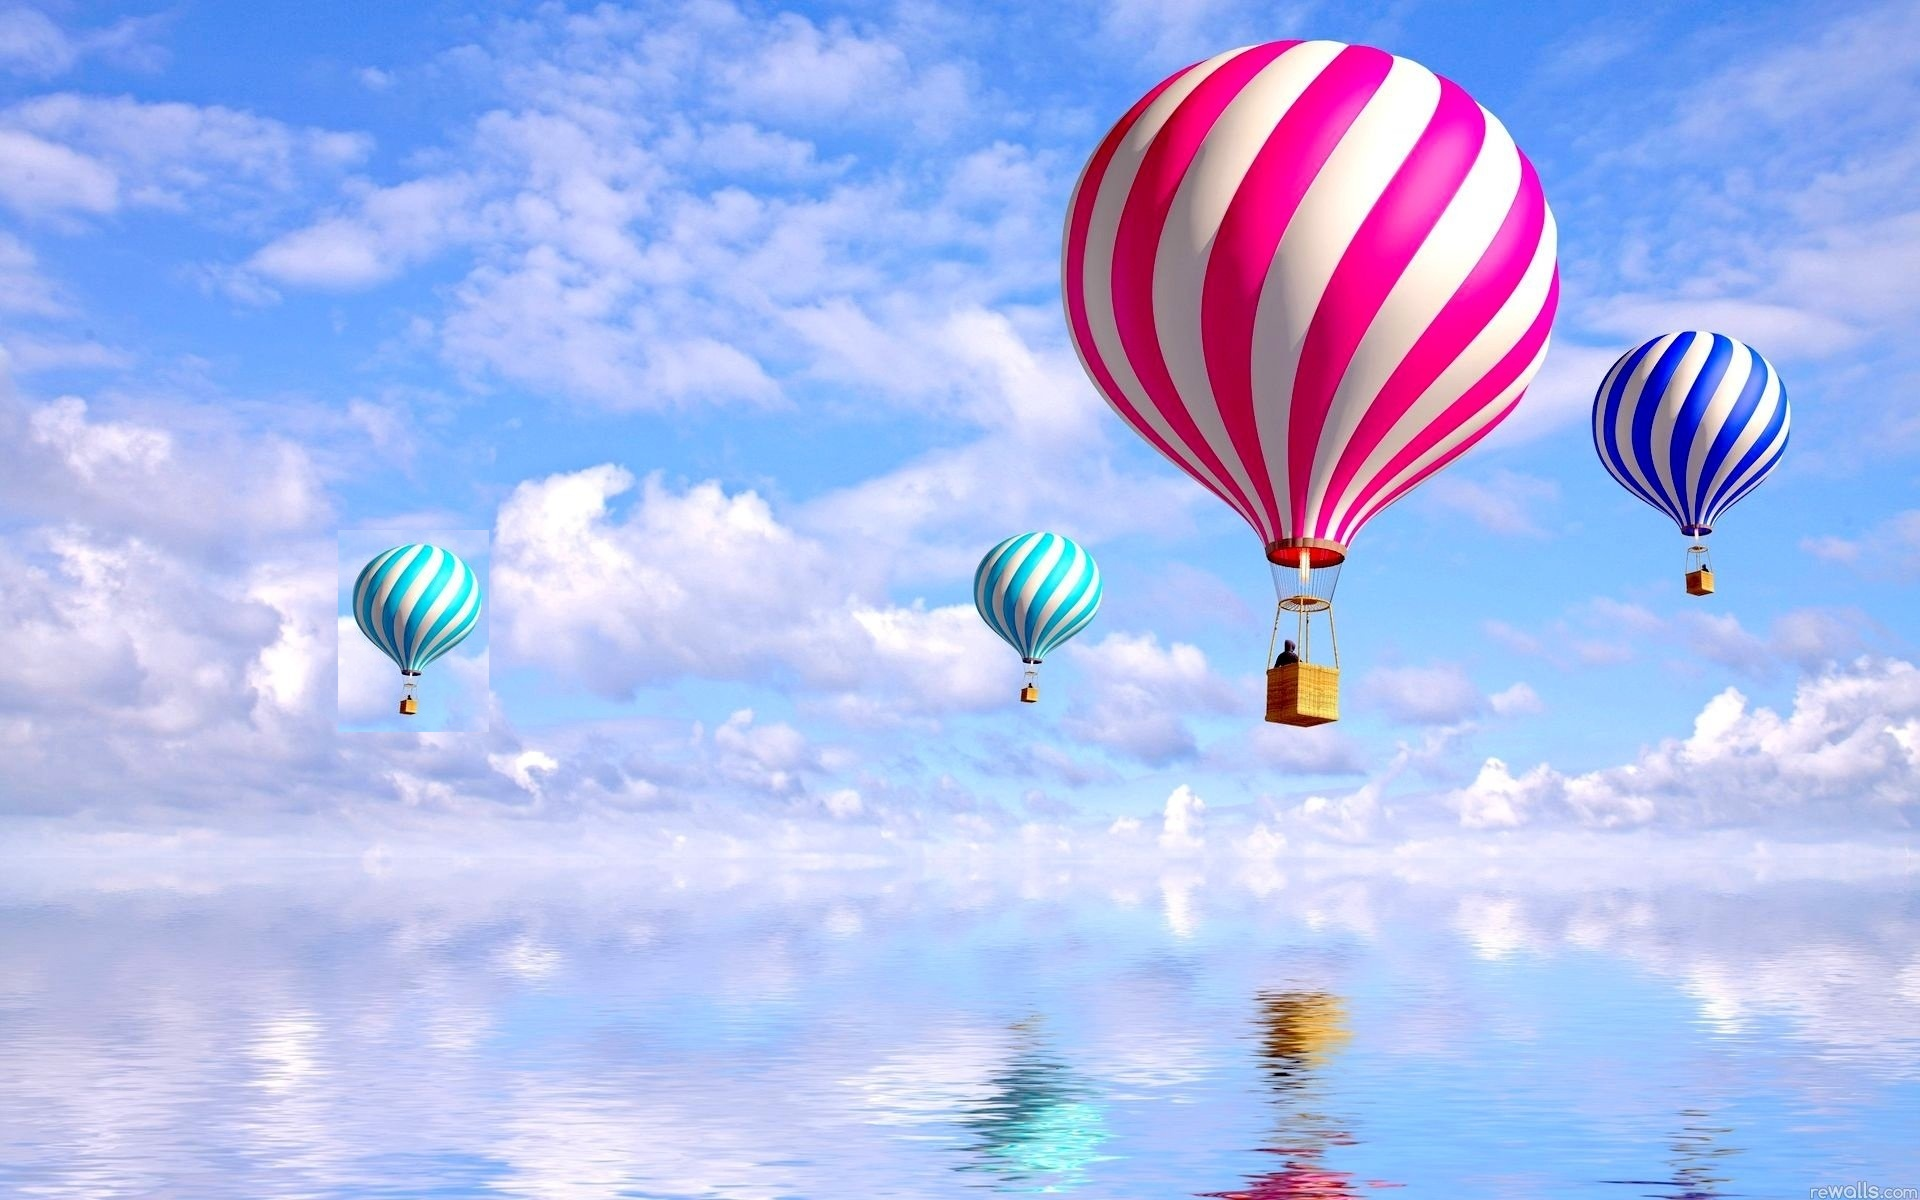

## Q2. 
### From the "Image_1.jpg" extract the red, green and blue pixels of the image and show them in a pie-chart. (Use only numpy for RGB pixels extraction, plotting can be done using any library) 

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [26]:
x= np.argmax(img[:,:],axis=2)

In [36]:
y= np.unique(x, return_counts=True)

In [67]:
label='Blue', 'Green', 'Red'
color= 'b', 'g', 'r'

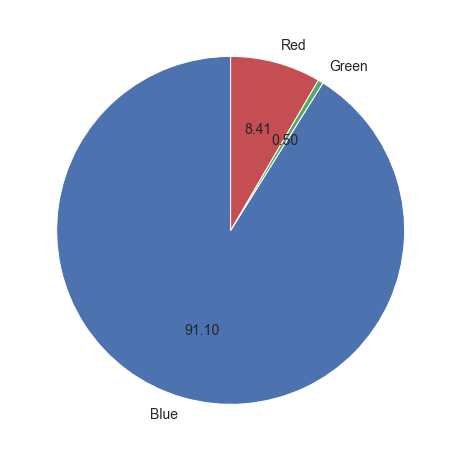

In [81]:
plt.figure(figsize=(12,8))
plt.pie((y[1]/y[1].sum())*100, labels=label, autopct='%1.2f',startangle=90, colors=color,textprops={'fontsize': 14});

## Q3. Read an input image and convert it to grayscale applying the formulas given below: 
```
Lightness method:
grey=(max(R, G, B) + min(R, G, B)) / 2

Average method:
grey=(R + G + B) / 3

Luminosity method:
grey=0.21 R + 0.72 G + 0.07 B

Save the outputs into a folder named output.
( Do not use cv2.cvtColor)
```

## Let's do it using Average Method first:
```
Average method:
grey=(R + G + B) / 3
```

In [64]:
# Read the image(Since we made changes to the original)

img= cv2.imread('Image_1.jpg')

In [10]:
# Summing the value of second axis will give sum of each pixel's BGR component
avggrey=img.sum(axis=2)
avggrey

array([[487, 490, 493, ..., 534, 534, 537],
       [490, 493, 496, ..., 537, 540, 543],
       [494, 497, 503, ..., 543, 544, 547],
       ...,
       [608, 608, 608, ..., 473, 594, 583],
       [608, 608, 608, ..., 463, 589, 594],
       [599, 599, 599, ..., 580, 616, 585]], dtype=uint32)

In [11]:
# Let's divide each of these by 3
avggrey=avggrey/3

### Remember, your value data_type should always be 'uint8'.

In [12]:
avggrey=avggrey.astype('uint8')

In [13]:
# Let's see the output greyscale image using Average Method
#display the image
cv2.imshow('Avg Greyscale',avggrey)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
cv2.imwrite(os.path.join(savepath , 'Avg_Grayscale.jpg'), avggrey)
cv2.waitKey(0);

## Luminosity Method
```
grey=0.21 R + 0.72 G + 0.07 B
```

In [14]:
B = img[:, :, 0]
G = img[:, :, 1]
R = img[:, :, 2]
img_gray = R * 0.21 + G * 0.72 + B * 0.07

In [15]:
img_gray=img_gray.astype('uint8')

In [16]:
#display the image
cv2.imshow('Luminosity Greyscale',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [74]:
cv2.imwrite(os.path.join(savepath , 'Lum_Grayscale.jpg'), img_gray)
cv2.waitKey(0);

## Lightness method
```
grey=(max(R, G, B) + min(R, G, B)) / 2
```

In [17]:
light_grey=(img.max(axis=2)+img.min(axis=2))/2

In [18]:
light_grey=light_grey.astype('uint8')

In [19]:
#display the image
cv2.imshow('Light Greyscale',light_grey)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
cv2.imwrite(os.path.join(savepath , 'Light_Grayscale.jpg'), light_grey)
cv2.waitKey(0);

## Q4. Go to practice_data/cv_demo_data
### For each image extract, the image name, folder in which it is located(label), size of image, resolution, aspect ratio in a dataframe and save the output as data_exploration.csv

### I've saved the image in my current directory and let's get the output for all of the images in all the folder:

In [76]:
newpath='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment'
lis2=os.listdir(newpath)
lis2

['.ipynb_checkpoints',
 'c.jpeg',
 'Computer Vision Assignment 1.ipynb',
 'cv_demo_data',
 'Image_1.jpg',
 'outputs']

### Above is the list of all the folders and files in my Week 1 Assignment folder. Now all the folders with images are saved in cv_demo_data folder. Let's use that folder as the original path and get the info of each image as a dataframe

In [77]:
workingpath='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment\\cv_demo_data'
lis2=os.listdir(workingpath)
lis2

['better india',
 'business',
 'founders',
 'java_power_tools',
 'maths sas',
 'power_pricing',
 'sed and awk',
 'third_wave']

### Now let's get info of all the images inside all these folders

In [152]:
d = []
for a in lis2:
    newpath=workingpath+'\\'+a
    #os.chdir(newpath)
    lis = os.listdir(newpath)
    lis_img=list(filter(lambda x:x.endswith('.jpg'),lis))
    
    for f in lis_img:
        #read image
        imagepath=newpath+'\\'+f
        img2=cv2.imread(imagepath)
        aratio=img2.shape[:2][0]/img2.shape[:2][1]
        d.append({'Image Name': f, 'Folder': a, 'Image Size': img2.size, 'Resolution': str(img2.shape[:2][1])+' x '+str(img2.shape[:2][0]), 'Aspect Ratio': aratio})

### To convert it into DataFrame, we will need Pandas

In [108]:
import pandas as pd

In [153]:
data_exploration=pd.DataFrame(d,columns=['Image Name', 'Folder', 'Image Size', 'Resolution', 'Aspect Ratio'])
data_exploration

,Image Name,Folder,Image Size,Resolution,Aspect Ratio
0,books_0_1007.jpg,better india,12605535,1119 x 3755,3.355675
1,books_0_1075.jpg,better india,12605535,1119 x 3755,3.355675
2,books_0_1209.jpg,better india,12149280,1056 x 3835,3.631629
3,books_0_1456.jpg,better india,12149280,1056 x 3835,3.631629
4,books_0_2159.jpg,better india,12605535,1119 x 3755,3.355675
5,books_0_2875.jpg,better india,12149280,1056 x 3835,3.631629
6,books_0_293.jpg,better india,12605535,1119 x 3755,3.355675
7,books_0_3252.jpg,better india,12149280,1056 x 3835,3.631629
8,books_0_3581.jpg,better india,12605535,1119 x 3755,3.355675
9,books_0_3784.jpg,better india,12149280,1056 x 3835,3.631629


In [120]:
data_exploration.index.name="Image_No."

### And we then save this as csv

In [122]:
os.chdir('C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment')

In [123]:
data_exploration.to_csv('data_exploration.csv')

## Q5. Given a collage of pictures in a single image c.jpeg. Separate the images and store them in a folder.

In [133]:
im3=cv2.imread('c.jpeg')

In [137]:
#display the image
cv2.imshow('Collage',im3)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Now getting images of girls separately from this collage

In [139]:
girl1 = im3[58:345,325:693]

In [140]:
#display the image
cv2.imshow('First Girl',girl1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [142]:
savepath2='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment\\collage_images'

In [143]:
cv2.imwrite(os.path.join(savepath2 , 'First Girl.jpg'), girl1)
cv2.waitKey(0);

In [144]:
girl2= im3[355:619,325:503]

In [145]:
#display the image
cv2.imshow('Second Girl',girl2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [146]:
cv2.imwrite(os.path.join(savepath2 , 'Second Girl.jpg'), girl2)
cv2.waitKey(0);

In [147]:
girl3= im3[355:619,513:692]

In [148]:
#display the image
cv2.imshow('Third Girl',girl3)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [149]:
cv2.imwrite(os.path.join(savepath2 , 'Third Girl.jpg'), girl3)
cv2.waitKey(0);

## Q6. You are given a folder of images and you have to perform some tasks/operations on each of them and filter valid images.
```
a. Don’t take if an image is duplicate (An image is matching exactly pixel to pixel
   with another image)
b. Images with very less size are not needed. (Image should be atleast 50X50
   pixels)
c. Images having long/wide pixels are not needed. (Image having either
   width/height of the image is too less than other, The condition is ratio of them
   should not be more than 5).

Store whichever passes all these conditions into a separate folder named valid
```

In [159]:
savepath3='C:\\Users\\amit.amola\\Python Stuff\\Computer Vision\\Week 1 Assignment\\valid'

In [176]:
p=1
for a in lis2:
    m=[]
    newpath=workingpath+'\\'+a
    lis = os.listdir(newpath)
    lis_img=list(filter(lambda x:x.endswith('.jpg'),lis))
    
    images=[]
    for f in lis_img:
        imagepath=newpath+'\\'+f
        im4=cv2.imread(imagepath)
        images.append(im4)
       
    for i in images:
        k=0
        for j in images:
            if (np.array_equal(i,j)):
                k=k+1
            else:
                continue
        if (k<2) and i.size>(50*50*3) and (i.shape[:2][0]/i.shape[:2][1])<5.0:
            cv2.imwrite(os.path.join(savepath3 , 'image'+str(p)+'.jpg'), i)
            cv2.waitKey(0);
            p=p+1